In [88]:
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt

In [89]:

# Load your dataset
df = pd.read_csv("final_df.csv")
world_map = gpd.read_file('world_map.geojson')


In [90]:
df["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
       'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'L

In [91]:
world_map

id                  name  \
0    AFG           Afghanistan   
1    AGO                Angola   
2    ALB               Albania   
3    ARE  United Arab Emirates   
4    ARG             Argentina   
..   ...                   ...   
173  PSE             West Bank   
174  YEM                 Yemen   
175  ZAF          South Africa   
176  ZMB                Zambia   
177  ZWE              Zimbabwe   

                                              geometry  
0    POLYGON ((61.22412 35.65677, 62.23222 35.26745...  
1    MULTIPOLYGON (((23.92439 -10.92663, 24.03240 -...  
2    POLYGON ((20.57606 41.85210, 20.46805 41.51355...  
3    POLYGON ((51.57516 24.24790, 51.75518 24.29868...  
4    MULTIPOLYGON (((-66.94869 -54.90326, -67.56076...  
..                                                 ...  
173  POLYGON ((35.55356 32.38984, 35.55356 31.78047...  
174  POLYGON ((53.12331 16.64763, 52.36724 16.37680...  
175  POLYGON ((16.32763 -28.58161, 16.83168 -28.073...  
176  POLYGON ((32.74527 -9.23392, 33.24932 -9.67402...  
177  POLYGON ((31.19712 -22.25087, 30.65707 -22.149...  

[178 rows x 3 columns]

In [92]:
df

Country  Year  Literarcy rate  Disease_deaths  \
0     Afghanistan  2011        31.44885             227   
1     Afghanistan  2011        31.44885             248   
2     Afghanistan  2011        31.44885             268   
3     Afghanistan  2015        38.16804             210   
4     Afghanistan  2015        38.16804             233   
...           ...   ...             ...             ...   
1855     Zimbabwe  2014        88.69342             358   
1856     Zimbabwe  2014        88.69342             395   
1857     Zimbabwe  2015        86.87348             314   
1858     Zimbabwe  2015        86.87348             346   
1859     Zimbabwe  2015        86.87348             383   

     Road traffic death rate  Suicide rate  Schizophrenia (%)  \
0           14.2 [12.0-16.4]        6.4200           0.165272   
1           14.2 [12.0-16.4]        6.4200           0.165272   
2           14.2 [12.0-16.4]        6.4200           0.165272   
3           14.4 [12.3-16.4]        5.9900           0.165895   
4           14.4 [12.3-16.4]        5.9900           0.165895   
...                      ...           ...                ...   
1855        37.9 [31.4-44.4]       30.8330           0.155993   
1856        37.9 [31.4-44.4]       30.8330           0.155993   
1857        38.7 [32.0-45.5]       30.7352           0.156465   
1858        38.7 [32.0-45.5]       30.7352           0.156465   
1859        38.7 [32.0-45.5]       30.7352           0.156465   

      Bipolar disorder (%)  Eating disorders (%)  Anxiety disorders (%)  \
0                 0.705688              0.098638               4.864773   
1                 0.705688              0.098638               4.864773   
2                 0.705688              0.098638               4.864773   
3                 0.707275              0.104445               4.875201   
4                 0.707275              0.104445               4.875201   
...                    ...                   ...                    ...   
1855              0.608610              0.118073               3.093964   
1856              0.608610              0.118073               3.093964   
1857              0.609363              0.119470               3.098687   
1858              0.609363              0.119470               3.098687   
1859              0.609363              0.119470               3.098687   

      Drug use disorders (%)  Depression (%)  Alcohol use disorders (%)  \
0                   2.573170        4.130862                   0.662254   
1                   2.573170        4.130862                   0.662254   
2                   2.573170        4.130862                   0.662254   
3                   2.543144        4.135419                   0.662276   
4                   2.543144        4.135419                   0.662276   
...                      ...             ...                        ...   
1855                0.768914        3.140290                   1.515470   
1856                0.768914        3.140290                   1.515470   
1857                0.771802        3.155710                   1.514751   
1858                0.771802        3.155710                   1.514751   
1859                0.771802        3.155710                   1.514751   

      Deaths  
0      7.931  
1      7.931  
2      7.931  
3      7.331  
4      7.331  
...      ...  
1855   9.123  
1856   9.123  
1857   8.774  
1858   8.774  
1859   8.774  

[1860 rows x 14 columns]

In [93]:
merged_data = world_map.merge(df, how='left', left_on='name', right_on='Country')
merged_data
# merged_geojson = json.loads(merged_data.to_json())


id         name                                           geometry  \
0     AFG  Afghanistan  POLYGON ((61.22412 35.65677, 62.23222 35.26745...   
1     AFG  Afghanistan  POLYGON ((61.22412 35.65677, 62.23222 35.26745...   
2     AFG  Afghanistan  POLYGON ((61.22412 35.65677, 62.23222 35.26745...   
3     AFG  Afghanistan  POLYGON ((61.22412 35.65677, 62.23222 35.26745...   
4     AFG  Afghanistan  POLYGON ((61.22412 35.65677, 62.23222 35.26745...   
...   ...          ...                                                ...   
1734  ZWE     Zimbabwe  POLYGON ((31.19712 -22.25087, 30.65707 -22.149...   
1735  ZWE     Zimbabwe  POLYGON ((31.19712 -22.25087, 30.65707 -22.149...   
1736  ZWE     Zimbabwe  POLYGON ((31.19712 -22.25087, 30.65707 -22.149...   
1737  ZWE     Zimbabwe  POLYGON ((31.19712 -22.25087, 30.65707 -22.149...   
1738  ZWE     Zimbabwe  POLYGON ((31.19712 -22.25087, 30.65707 -22.149...   

          Country    Year  Literarcy rate  Disease_deaths  \
0     Afghanistan  2011.0        31.44885           227.0   
1     Afghanistan  2011.0        31.44885           248.0   
2     Afghanistan  2011.0        31.44885           268.0   
3     Afghanistan  2015.0        38.16804           210.0   
4     Afghanistan  2015.0        38.16804           233.0   
...           ...     ...             ...             ...   
1734     Zimbabwe  2014.0        88.69342           358.0   
1735     Zimbabwe  2014.0        88.69342           395.0   
1736     Zimbabwe  2015.0        86.87348           314.0   
1737     Zimbabwe  2015.0        86.87348           346.0   
1738     Zimbabwe  2015.0        86.87348           383.0   

     Road traffic death rate  Suicide rate  Schizophrenia (%)  \
0           14.2 [12.0-16.4]        6.4200           0.165272   
1           14.2 [12.0-16.4]        6.4200           0.165272   
2           14.2 [12.0-16.4]        6.4200           0.165272   
3           14.4 [12.3-16.4]        5.9900           0.165895   
4           14.4 [12.3-16.4]        5.9900           0.165895   
...                      ...           ...                ...   
1734        37.9 [31.4-44.4]       30.8330           0.155993   
1735        37.9 [31.4-44.4]       30.8330           0.155993   
1736        38.7 [32.0-45.5]       30.7352           0.156465   
1737        38.7 [32.0-45.5]       30.7352           0.156465   
1738        38.7 [32.0-45.5]       30.7352           0.156465   

      Bipolar disorder (%)  Eating disorders (%)  Anxiety disorders (%)  \
0                 0.705688              0.098638               4.864773   
1                 0.705688              0.098638               4.864773   
2                 0.705688              0.098638               4.864773   
3                 0.707275              0.104445               4.875201   
4                 0.707275              0.104445               4.875201   
...                    ...                   ...                    ...   
1734              0.608610              0.118073               3.093964   
1735              0.608610              0.118073               3.093964   
1736              0.609363              0.119470               3.098687   
1737              0.609363              0.119470               3.098687   
1738              0.609363              0.119470               3.098687   

      Drug use disorders (%)  Depression (%)  Alcohol use disorders (%)  \
0                   2.573170        4.130862                   0.662254   
1                   2.573170        4.130862                   0.662254   
2                   2.573170        4.130862                   0.662254   
3                   2.543144        4.135419                   0.662276   
4                   2.543144        4.135419                   0.662276   
...                      ...             ...                        ...   
1734                0.768914        3.140290                   1.515470   
1735                0.768914        3.140290                   1.51

In [95]:
merged_data["Country"].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', nan, 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Brazil', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cuba', 'Cyprus', 'Germany', 'Djibouti', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Eritrea', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon',
       'Georgia', 'Ghana', 'Guinea', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'Guyana', 'Honduras', 'Croatia', 'Haiti', 'Hungary',
       'Indonesia', 'India', 'Ireland', 'Iraq', 'Iceland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya',
       'Cambodia', 'Kuwait', 'Lebanon', 'Liberia', 'Libya', 'Sri Lanka',
       'Lesotho', 'L

In [94]:
data_col_names = ['Literarcy rate', 'Disease_deaths', 'Road traffic death rate', 'Suicide rate', 'Schizophrenia (%)', 'Bipolar disorder (%)', 'Eating disorders (%)', 'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)', 'Alcohol use disorders (%)', 'Deaths']
features = []
for item in merged_data.groupby(['Country']):
    name = item[0]
    geometry = mapping(item[1]["geometry"][list(item[1]["geometry"].keys())[0]])
    data = {}
    for year in item[1]["Year"]:
        year_full_data = item[1][item[1]["Year"] == year][data_col_names].to_dict()
        if(year not in data):
            curr_data = {}
            for k,v in year_full_data.items():
                curr_data[k] = v[list(v.keys())[0]]
        
            data[int(year)] = curr_data

    features.append(
        {
        'type': 'Feature',
        'geometry': geometry,
        'properties': {
            'name': name,
            'data': data
        }
    }
    )


geojson_data = {'type': 'FeatureCollection', 'features': features}
with open('merged_world_map_new.geojson', 'w') as f:
    json.dump(geojson_data, f)

/tmp/ipykernel_79172/3331664824.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for item in merged_data.groupby(['Country']):


In [82]:
# grouped_data = merged_data.groupby(['Country']).apply(
#     lambda x: {
#         'name': x['name'].iloc[0],  # Keep the name
#         'geometry': x['geometry'].iloc[0],  # Keep the geometry
#         'data': {  # Construct the 'data' dictionary
#             year: x.drop(['name', 'geometry', 'Country']).set_index('Year').loc[year].to_dict()
#             for year in x['Year']
#         }
#     }
# ).reset_index()

# # Convert the grouped data to GeoJSON format
# features = [
#     {
#         'type': 'Feature',
#         'geometry': item['geometry'],
#         'properties': {
#             'name': item['name'],
#             'data': item['data']
#         }
#     }
#     for _, item in grouped_data.iterrows()
# ]

# geojson_data = {'type': 'FeatureCollection', 'features': features}


In [81]:
geojson_data["features"][0]

{'type': 'Feature',
 'geometry': <POLYGON ((61.224 35.657, 62.232 35.267, 62.988 35.403, 63.204 35.86, 63.996...>,
 'properties': {'name': 'Afghanistan',
  'data': {2011.0: {'Literarcy rate': 31.44885,
    'Disease_deaths': 227.0,
    'Road traffic death rate': '14.2 [12.0-16.4]',
    'Suicide rate': 6.42,
    'Schizophrenia (%)': 0.165271894,
    'Bipolar disorder (%)': 0.705688469,
    'Eating disorders (%)': 0.098638115,
    'Anxiety disorders (%)': 4.864773417,
    'Drug use disorders (%)': 2.573169938,
    'Depression (%)': 4.130862192,
    'Alcohol use disorders (%)': 0.662254251,
    'Deaths': 7.931},
   2015.0: {'Literarcy rate': 38.16804,
    'Disease_deaths': 210.0,
    'Road traffic death rate': '14.4 [12.3-16.4]',
    'Suicide rate': 5.99,
    'Schizophrenia (%)': 0.165895095,
    'Bipolar disorder (%)': 0.70727518,
    'Eating disorders (%)': 0.104445057,
    'Anxiety disorders (%)': 4.875200804,
    'Drug use disorders (%)': 2.543144192,
    'Depression (%)': 4.13541925,


In [86]:
from shapely.geometry import mapping
merged_geojson['features']
    

[{'id': '0',
  'type': 'Feature',
  'properties': {'id': 'AFG',
   'name': 'Afghanistan',
   'Country': 'Afghanistan',
   'Year': 2011.0,
   'Literarcy rate': 31.44885,
   'Disease_deaths': 227.0,
   'Road traffic death rate': '14.2 [12.0-16.4]',
   'Suicide rate': 6.42,
   'Schizophrenia (%)': 0.165271894,
   'Bipolar disorder (%)': 0.705688469,
   'Eating disorders (%)': 0.098638115,
   'Anxiety disorders (%)': 4.864773417,
   'Drug use disorders (%)': 2.573169938,
   'Depression (%)': 4.130862192,
   'Alcohol use disorders (%)': 0.662254251,
   'Deaths': 7.931},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[61.22412241224123, 35.65677453645364],
     [62.23222322232223, 35.26745101770176],
     [62.98829882988301, 35.40286789378936],
     [63.204320432043204, 35.85989985058505],
     [63.99639963996401, 36.0122438361836],
     [64.53645364536453, 36.316931807380726],
     [64.75247524752476, 37.11250595439543],
     [65.5805580558056, 37.298704159015884],
     [65.760576057

In [83]:
with open('merged_world_map_new.geojson', 'w') as f:
    json.dump(geojson_data, f)

TypeError: Object of type Polygon is not JSON serializable

In [39]:
aggregated_data = df.groupby('Country')['Literarcy rate'].mean().reset_index()
aggregated_data

Country  Literarcy rate
0                 Albania       97.259558
1                 Algeria       74.316658
2                  Angola       68.199897
3     Antigua and Barbuda       98.950000
4               Argentina       97.772433
..                    ...             ...
116  United Arab Emirates       91.510110
117               Uruguay       98.252182
118               Vanuatu       82.719560
119                Zambia       74.600310
120              Zimbabwe       86.383203

[121 rows x 2 columns]

In [30]:
merged_data = world_map.merge(aggregated_data, how='left', left_on='name', right_on='Country')

# Convert merged data to GeoJSON-like format
merged_geojson = json.loads(merged_data.to_json())

# Write merged GeoJSON data to a file
with open('merged_world_map.geojson', 'w') as f:
    json.dump(merged_geojson, f)

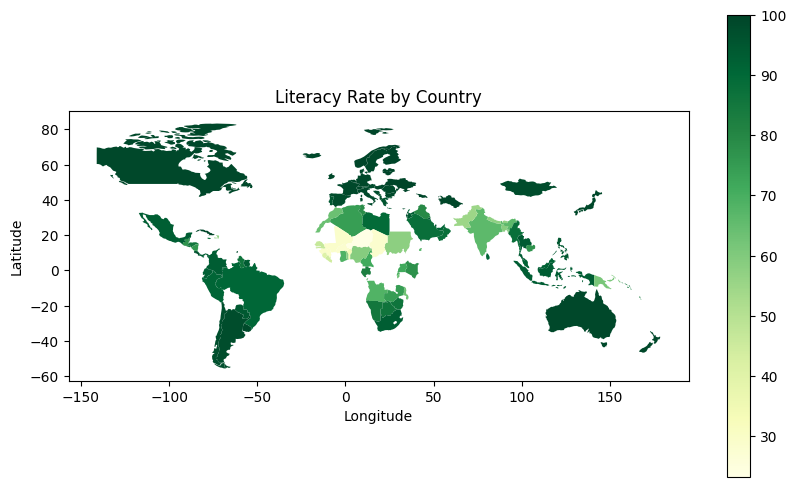

In [33]:
with open('merged_world_map.geojson', 'r') as f:
    merged_geojson = json.load(f)

# Create a GeoDataFrame from the GeoJSON data
gdf = gpd.GeoDataFrame.from_features(merged_geojson['features'])

# Plot the choropleth map
gdf.plot(column='Literarcy rate', cmap='YlGn', legend=True, figsize=(10, 6))
plt.title('Literacy Rate by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()